In [396]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as smf

pd.set_option('display.max_columns', 500)


%matplotlib inline

In [397]:
estimate = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2009/Tenth_Data_rs_day.csv',thousands = ',')


In [476]:
estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)

In [399]:
estimate['NUM_BUS_STOPS'] = estimate['NUM_BUS_STOPS'] - 1

In [400]:
estimate.RUNSPEED = estimate.RUNSPEED.clip(upper = 40)
estimate.RUNSPEED = estimate.TOTSPEED.clip(upper = 40)


In [401]:
drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'ALAND00',
'AWATER00',
'COUNTYFP00',
'CTIDFP00',
'NAME00',
'TRACTCE00',
'Id',
'Id2',
'Geography',
'geometry_a',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']

In [402]:
estimate = estimate.drop(drop,axis = 1)

In [403]:
change = ['BART_FROMS','BART_TOS','MUNI_RAIL_ALIGHTINGS','MUNI_RAIL_BOARDINGS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

In [404]:
for column in change:
    estimate[column] = estimate[column].fillna(0)

In [405]:
change = ['Average Hourly Price',
'Count_',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'HOUSING_09_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'PER_HH_0VEH',
'PER_INCOME_0-15',
'PER_INCOME_100+',
'PER_INCOME_15-50',
'PER_INCOME_50-100',
'PRICE12HR',
'PRICE1HR',
'PRICE2HR',
'PRICE3HR',
'PRICE4HR',
'PRICEDAY',
'PRICEDAYDISCOUNT',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)',
'parking_rate']

In [406]:
changes = ['PARK_HOURLY_AVG_ON',
'TRANSBAY',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'HOUSING_09_DEN',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'PARK_12_HR_OFF_PUB',
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'PARK_DAY_OFF_PUB',
'PARK_DAY_DISCOUNT_OFF_PUB',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'AVG_TT_TO_WORK_MINUTES',
'PARKING_RATE_OFF_RESIDENTIAL']

In [407]:
def rename_column(old_columns,new_columns,df):
    num = len(old_columns)
    count = 0
    while count < num:
        df[new_columns[count]] = df[old_columns[count]]
        df = df.drop(old_columns[count],axis = 1)
        
        count = count + 1
    return df

In [408]:
estimate = rename_column(change,changes,estimate)


In [409]:
estimate['EXCLUDE'] = 0
check = ['EMP_WAC_DEN','LEISER_RAC_DEN','LEISER_WAC_DEN','OTHER_RAC_DEN','OTHER_WAC_DEN','RETAIL_RAC_DEN','RETAIL_WAC_DEN','ON']
count = 0
for column in check:
    while count < len(estimate[column]):
        if np.isnan(estimate[column][count]):
                print('Got One')
                estimate['EXCLUDE'][count] = 1
        count = count + 1

Got One
Got One
Got One
Got One
Got One


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One


In [410]:
data = estimate[estimate['EXCLUDE'] == 0]

In [411]:
estimate.EXCLUDE.unique()

array([0, 1], dtype=int64)

In [412]:
data.EXCLUDE.unique()

array([0], dtype=int64)

In [413]:
data['AVG_RIDE'] = (data.ON + data.OFF)/2

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [414]:
#dont need to use the average ridership because ON and OFF are reasonably equal 
#data['AVG_RIDE'] = (data['ON'] + data['OFF'])/2

data['LOG_RIDERS'] = np.log(data.AVG_RIDE + 1)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [417]:
data['AVG_BART'] = (data['BART_FROMS']+data['BART_TOS'])/2
data['CALTRAIN_AVG'] = (data.CALTRAIN_OFF + data.CALTRAIN_ON)/2
data['MUNI_RAIL_AVG'] = (data.MUNI_RAIL_ALIGHTINGS + data.MUNI_RAIL_BOARDINGS)/2
data['BIKE_AVG'] = (data.BIKE_ALIGHTINGS + data.BIKE_BOARDINGS)/2

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [261]:
for column in data.columns.sort_values():
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_HH_SIZE
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_AVG
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_DEN
EDHLTH_WAC_DEN
EMP_RAC_DEN
EMP_WAC_DEN
EOL
EXCLUDE
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_DEN
HU_DEN_ACS
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_WAC_DEN
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_AVG
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_DEN
OTHER_WAC_DEN
PARKING_RATE_OFF_RESIDENTIAL
PARK_12_HR_OFF_PUB
PARK_1_HR_OFF_PUB
PARK_2_HR_OFF_PUB
PARK_3_HR_OFF_PUB
PARK_4_HR_OFF_PUB
PARK_DAY_DISCOUNT_OFF_PUB
PARK_DAY_OFF_PUB
PARK_HOURLY_AVG_ON
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
RETAIL_RAC_DEN
RETAIL_WAC_DEN
ROUTE_LONG_NAME
ROUTE_SHORT_NAME
ROUTE_TYPE
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SEQ
SERVMILES
SERVMILES_S
SHR_HH

In [418]:
log_change = ['PARK_12_HR_OFF_PUB',
'BIKE_BOARDINGS',
'BIKE_ALIGHTINGS',
'BIKE_AVG',     
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'AVG_BART',
'AVG_HH_SIZE',
'AVG_TT_TO_WORK_MINUTES',
'BART_FROMS',
'BART_TOS',
'CALTRAIN_AVG',
'CALTRAIN_OFF',
'CALTRAIN_ON',
'CAPACITY',
'CROWDED',
'CROWDHOURS',
'PARK_DAY_DISCOUNT_OFF_PUB',
'PARK_DAY_OFF_PUB',
'DWELL',
'DWELL_S',
'EDD_EMP',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'FARE',
'FREQ_S',
'FULLFARE_REV',
'HEADWAY_S',
'HH_DEN_ACS',
'PARK_HOURLY_AVG_ON',
'HOUSING_09_DEN',
'HU_DEN_ACS',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'MUNI_RAIL_ALIGHTINGS',
'MUNI_RAIL_AVG',
'MUNI_RAIL_BOARDINGS',
'NUM_BUS_STOPS',
'OCC_RATE',
'OFF',
'ON',
'ONTIME5',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'PARKING_RATE_OFF_RESIDENTIAL',
'PASSDELAY_ARR',
'PASSDELAY_DEP',
'PASSHOURS',
'PASSMILES',
'POP_DEN_ACS',
'RDBRDNGS',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'RUNSPEED',
'RUNSPEED_S',
'RUNTIME',
'RUNTIME_S',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'TOTSPEED',
'TOTSPEED_S',
'TOTTIME',
'TOTTIME_S',
'Total_Housing_Units',
'Total_Pop',
'VAC_RATE',
'VC',
'WAITHOURS']



In [ ]:
# my categorical variables, 0 or 1
#EOL
#TRANSBAY
#SOL

In [ ]:
for column in log_change:
    data[column + '_LOG'] = data[column].apply(lambda value: np.log(value + 1))

In [422]:
def check(value):
    if value == 'N':
        value = ''
    else:
        value = value
    return value

In [208]:
#data.AVG_TT_TO_WORK_MINUTES = data.AVG_TT_TO_WORK_MINUTES.apply(lambda value: check(value))

In [420]:
data.AVG_TT_TO_WORK_MINUTES = data.AVG_TT_TO_WORK_MINUTES.convert_objects(convert_numeric = True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
data['DIST_FROM_LAST_STOP'] = data['SERVMILES_S'] / (data['FREQ_S']*24)

In [ ]:
data['DIST_FROM_LAST_STOP_LOG'] = data['DIST_FROM_LAST_STOP'].apply(lambda value: np.log(value + 1))

In [421]:
data['SERVMILES_S_LOG'] = data['SERVMILES_S'].apply(lambda x : np.log(x + 1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [425]:
data['EOL_SOL'] = data['EOL'] + data['SOL']

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [426]:
data.to_csv('Tenth_Modeling_Data.csv')

In [272]:
# basic set of initial variables that all look good, except for EOL it is explainable since this data is directional
# but is more complex than desired.

mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_DEN \
                       + HOUSING_09_DEN \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL \
                       + SOL \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1279.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:46:06   Log-Likelihood:            -1.0912e+05
No. Observations:               16897   AIC:                         2.183e+05
Df Residuals:                   16891   BIC:                         2.183e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_DEN        0.0061      0.000     14.

In [274]:
mod = smf.formula.ols(formula="ON_LOG \
                       ~ EMP_WAC_DEN_LOG \
                       + FREQ_S \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON\
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     9126.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:46:17   Log-Likelihood:                -31500.
No. Observations:               16895   AIC:                         6.302e+04
Df Residuals:                   16887   BIC:                         6.308e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EMP_WAC_DEN_LOG        0.3009      0

In [275]:
# Run 101 
# Start from preferred model from last week.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_DEN_LOG \
                       + FREQ_S \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.512e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:46:26   Log-Likelihood:                -28755.
No. Observations:               16895   AIC:                         5.753e+04
Df Residuals:                   16887   BIC:                         5.759e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EMP_WAC_DEN_LOG        0.3207      0

In [276]:
# Run 102
# Substitute EDD emp -- this fits slightly better, so go with it.  
# also, EDD we have proper change for one more year.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 1.508e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:46:34   Log-Likelihood:                -28452.
No. Observations:               16733   AIC:                         5.692e+04
Df Residuals:                   16725   BIC:                         5.698e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.3032      0

In [277]:
# Run 103
# Try EED without the log
# no good because neg on employment.  Use 102 instead.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP \
                       + FREQ_S \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:46:42   Log-Likelihood:                -29809.
No. Observations:               16733   AIC:                         5.963e+04
Df Residuals:                   16725   BIC:                         5.970e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP            -2.038e-07   4.28

In [278]:
# Run 104a 
# start from 102, and look at service/freq specs. 
# try HEADWAY instead --worse than FREQ_S

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + HEADWAY_S \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:46:49   Log-Likelihood:                -31361.
No. Observations:               16733   AIC:                         6.274e+04
Df Residuals:                   16725   BIC:                         6.280e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.5958      0

In [279]:
# Run 104b
# start from 102, and look at service/freq specs. 
# try HEADWAY_LOG instead -- no good.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + HEADWAY_S_LOG \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:46:57   Log-Likelihood:                -31002.
No. Observations:               16733   AIC:                         6.202e+04
Df Residuals:                   16725   BIC:                         6.208e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.4061      0

In [280]:
# Run 104c
# start from 102, and look at service/freq specs. 
# try Frequency log instead.  
# this fits better, but the emp coefficient goes down by half, and it 
# seems awfully sensitive to frequency.  Need to think about this.  

# right now, we're split between this and 102.  Let's go with this for now, and see how it goes...

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.762e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:47:03   Log-Likelihood:                -27298.
No. Observations:               16733   AIC:                         5.461e+04
Df Residuals:                   16725   BIC:                         5.467e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1528      0

In [281]:
# Run 105
# THis is the preferred model from above.  (also 102 is an option)

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.762e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:47:14   Log-Likelihood:                -27298.
No. Observations:               16733   AIC:                         5.461e+04
Df Residuals:                   16725   BIC:                         5.467e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1528      0

In [282]:
# Run 106
# Merge EOL and SOL -- use this...


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.008e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:47:20   Log-Likelihood:                -27322.
No. Observations:               16733   AIC:                         5.466e+04
Df Residuals:                   16726   BIC:                         5.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1532      0

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [283]:
# Run 106
# Try specifications for housing density/population

data['EOL_SOL'] = data['EOL'] + data['SOL']

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:47:27   Log-Likelihood:                -27253.
No. Observations:               16733   AIC:                         5.452e+04
Df Residuals:                   16725   BIC:                         5.458e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1432      0

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [284]:
# Run 107
# Try specifications for housing density/population
# This is pretty good.  Let's test the other terms just to see

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:47:36   Log-Likelihood:                -27268.
No. Observations:               16733   AIC:                         5.455e+04
Df Residuals:                   16725   BIC:                         5.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1417      0

In [285]:
for column in data.columns.sort_values():
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EOL_SOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOUSING_09_DEN
HOUSING_09_DEN_LOG
HU_DEN_ACS
HU_DEN_ACS_LOG
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_RAC_DEN_LOG
LEISER_WAC_DEN
LEISER_WAC_DEN_LOG
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_ALIGHTINGS_LOG
MUNI_RAIL_AVG
MUNI_RAIL_AVG_LOG
MUNI_RAIL_BOARDINGS
MUNI_RAIL_BOARDINGS_LOG
N

In [286]:
# Run 108
# Try specifications for housing density/population
# this one is worse than the one above...

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + Total_Housing_Units \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.757e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:48:02   Log-Likelihood:                -27321.
No. Observations:               16733   AIC:                         5.466e+04
Df Residuals:                   16725   BIC:                         5.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
EDD_EMP_LOG             0.1526    

In [287]:
# Run 109
# Try specifications for housing density/population
# this one is worse than the one above...

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + Total_Housing_Units_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.757e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:48:08   Log-Likelihood:                -27321.
No. Observations:               16733   AIC:                         5.466e+04
Df Residuals:                   16725   BIC:                         5.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EDD_EMP_LOG               

In [288]:
# Run 110
# Try specifications for housing density/population
# this one is worse than the one above...

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + POP_DEN_ACS \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.786e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:48:14   Log-Likelihood:                -27196.
No. Observations:               16733   AIC:                         5.441e+04
Df Residuals:                   16725   BIC:                         5.447e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1379      0

In [289]:
# Run 111
# Try specifications for housing density/population
# this one is worse than the one above...

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + POP_DEN_ACS_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:48:22   Log-Likelihood:                -27262.
No. Observations:               16733   AIC:                         5.454e+04
Df Residuals:                   16725   BIC:                         5.460e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1375      0

In [290]:
# Run 112
# Try specifications for housing density/population
# this one is worse than the one above...

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HH_DEN_ACS \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.777e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:48:26   Log-Likelihood:                -27236.
No. Observations:               16733   AIC:                         5.449e+04
Df Residuals:                   16725   BIC:                         5.455e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1371      0

In [291]:
# Run 113
# Try specifications for housing density/population
# this one is worse than the one above...

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HH_DEN_ACS_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.774e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:48:32   Log-Likelihood:                -27250.
No. Observations:               16733   AIC:                         5.452e+04
Df Residuals:                   16725   BIC:                         5.458e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1336      0

In [304]:
# Run 107
# Try specifications for housing density/population
# Run 107 is our preferred specification.  They are all pretty similar, but 
# we can measure the change better with this due to our planning dept. data.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:25:07   Log-Likelihood:                -27268.
No. Observations:               16733   AIC:                         5.455e+04
Df Residuals:                   16725   BIC:                         5.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1417      0

In [305]:
# Run 114
# Try avg HH size, this doesn't work.  Stick with 109.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:25:19   Log-Likelihood:                -27268.
No. Observations:               16733   AIC:                         5.455e+04
Df Residuals:                   16725   BIC:                         5.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1417      0

In [294]:
for column in data.columns.sort_values():
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EOL_SOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOUSING_09_DEN
HOUSING_09_DEN_LOG
HU_DEN_ACS
HU_DEN_ACS_LOG
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_RAC_DEN_LOG
LEISER_WAC_DEN
LEISER_WAC_DEN_LOG
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_ALIGHTINGS_LOG
MUNI_RAIL_AVG
MUNI_RAIL_AVG_LOG
MUNI_RAIL_BOARDINGS
MUNI_RAIL_BOARDINGS_LOG
N

In [306]:
# Run 114A
# Try different parking variables, this doesn't work.  Stick with 109.  
# -- reject because of a negative coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_12_HR_OFF_PUB \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3025.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:25:28   Log-Likelihood:                -4429.5
No. Observations:                2630   AIC:                             8875.
Df Residuals:                    2622   BIC:                             8922.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2213      0

In [307]:
# Run 114B
# Try different parking variables, this doesn't work.  Stick with 109.  
# -- reject because of a negative coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_1_HR_OFF_PUB \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3024.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:25:41   Log-Likelihood:                -4429.6
No. Observations:                2630   AIC:                             8875.
Df Residuals:                    2622   BIC:                             8922.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2053      0

In [308]:
# Run 114C
# Try different parking variables, this doesn't work.  Stick with 109.  
# -- reject because of a negative coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_2_HR_OFF_PUB \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3036.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:25:49   Log-Likelihood:                -4425.2
No. Observations:                2630   AIC:                             8866.
Df Residuals:                    2622   BIC:                             8913.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2278      0

In [309]:
# Run 114D
# Try different parking variables, this doesn't work.  Stick with 109.  
# -- reject because of a negative coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_3_HR_OFF_PUB \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3032.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:26:01   Log-Likelihood:                -4426.7
No. Observations:                2630   AIC:                             8869.
Df Residuals:                    2622   BIC:                             8916.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2306      0

In [310]:
# Run 114E
# Try different parking variables, this doesn't work.  Stick with 109.  
# -- reject because of a negative coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_4_HR_OFF_PUB \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3017.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:26:19   Log-Likelihood:                -4432.4
No. Observations:                2630   AIC:                             8881.
Df Residuals:                    2622   BIC:                             8928.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2146      0

In [311]:
# Run 114G
# Try different parking variables, this doesn't work.  Stick with 109.  
# -- reject because of a negative coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_DAY_DISCOUNT_OFF_PUB \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3026.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:26:36   Log-Likelihood:                -4429.1
No. Observations:                2630   AIC:                             8874.
Df Residuals:                    2622   BIC:                             8921.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDD_EMP_LOG           

In [313]:
# Run 114F
# Try different parking variables, this doesn't work.  Stick with 109.  
# -- reject because of a negative coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_DAY_OFF_PUB \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3025.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:27:30   Log-Likelihood:                -4429.5
No. Observations:                2630   AIC:                             8875.
Df Residuals:                    2622   BIC:                             8922.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2213      0

In [324]:
# Run 114F
# Try the log of different parking variables, this doesn't work  Stick with 109.  
# -- reject because of high p value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_4_HR_OFF_PUB_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     3004.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:32:54   Log-Likelihood:                -4437.6
No. Observations:                2630   AIC:                             8891.
Df Residuals:                    2622   BIC:                             8938.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
EDD_EMP_LOG               0.17

In [329]:
# Run 109
# After trying all of the parking variables average price of hourly on street parking is selected. 
#(revert back to run 109)

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:35:41   Log-Likelihood:                -27268.
No. Observations:               16733   AIC:                         5.455e+04
Df Residuals:                   16725   BIC:                         5.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1417      0

In [333]:
# Run 115
# Try log of the best parking variable on street hourly.  Stick with this.  
# -- slightly better fit and seems to make better since, with an increase in price at a higher price has less of
# an effect than an increase at a lower price. If you are paying $10 for a parking spot then you will pay $15,
# but may not pay $10 if it was $5 before.

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.774e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:39:48   Log-Likelihood:                -27247.
No. Observations:               16733   AIC:                         5.451e+04
Df Residuals:                   16725   BIC:                         5.457e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [337]:
# Run 116
# Add in the residential parking
# -- coefficient looks good, but transbay becomes insignificant

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:44:30   Log-Likelihood:                -22594.
No. Observations:               14020   AIC:                         4.521e+04
Df Residuals:                   14011   BIC:                         4.527e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EDD_EMP_LOG     

In [338]:
# Run 117
# Try the log 
# -- Transbay is still insignificant, but stick with this for now.

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.327e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:44:39   Log-Likelihood:                -22595.
No. Observations:               14020   AIC:                         4.521e+04
Df Residuals:                   14011   BIC:                         4.528e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [391]:
# Run 117
# Try parking without log transforms 
# an increase in log-like so stick with 117
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.325e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:26:24   Log-Likelihood:                -22608.
No. Observations:               14020   AIC:                         4.523e+04
Df Residuals:                   14011   BIC:                         4.530e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EDD_EMP_LOG     

In [336]:
max(data.PARKING_RATE_OFF_RESIDENTIAL)

5.7018348620000001

In [341]:
for column in data.columns.sort_values():
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EOL_SOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOUSING_09_DEN
HOUSING_09_DEN_LOG
HU_DEN_ACS
HU_DEN_ACS_LOG
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_RAC_DEN_LOG
LEISER_WAC_DEN
LEISER_WAC_DEN_LOG
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_ALIGHTINGS_LOG
MUNI_RAIL_AVG
MUNI_RAIL_AVG_LOG
MUNI_RAIL_BOARDINGS
MUNI_RAIL_BOARDINGS_LOG
N

In [344]:
# Run 118
# Add in 0 vehicle households
# -- reject because the coefficient is negative

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + SHR_HH_0VEH \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.195e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:47:19   Log-Likelihood:                -22592.
No. Observations:               14020   AIC:                         4.520e+04
Df Residuals:                   14010   BIC:                         4.528e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [345]:
# Run 119
# Try the log of 0 vehicle households
# -- reject because the coefficient is negative

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + SHR_HH_0VEH_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.195e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:47:57   Log-Likelihood:                -22594.
No. Observations:               14020   AIC:                         4.521e+04
Df Residuals:                   14010   BIC:                         4.528e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [348]:
# Run 120
# Try without the residential parking rate but keep 0 vehicle households
# -- reject because of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + SHR_HH_0VEH_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.577e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:49:53   Log-Likelihood:                -27247.
No. Observations:               16733   AIC:                         5.451e+04
Df Residuals:                   16724   BIC:                         5.458e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [349]:
# Run 121
# Try 0 veh households without log transformation
# -- reject because of high p-value and neg coef, stick with run 117

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + SHR_HH_0VEH \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.577e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:50:37   Log-Likelihood:                -27246.
No. Observations:               16733   AIC:                         5.451e+04
Df Residuals:                   16724   BIC:                         5.458e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [350]:
# Run 117


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.327e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:51:59   Log-Likelihood:                -22595.
No. Observations:               14020   AIC:                         4.521e+04
Df Residuals:                   14011   BIC:                         4.528e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [352]:
# Run 122
# Add in reliability
# -- good coef and goodness of fit slightly better (log-like), but transbay still insignificant. Stick with this
# for now

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:55:43   Log-Likelihood:                -22589.
No. Observations:               14020   AIC:                         4.520e+04
Df Residuals:                   14010   BIC:                         4.527e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [354]:
# Run 124
# Add in runspeed
# -- reject because of neg coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + RUNSPEED \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:56:18   Log-Likelihood:                -21723.
No. Observations:               14020   AIC:                         4.347e+04
Df Residuals:                   14009   BIC:                         4.355e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [355]:
# Run 125
# Try Total Speed
# -- reject because of neg coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + TOTSPEED \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.243e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:56:55   Log-Likelihood:                -21740.
No. Observations:               14020   AIC:                         4.350e+04
Df Residuals:                   14009   BIC:                         4.358e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [356]:
# Run 126
# Try Log of runspeed
# -- reject because of neg coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + RUNSPEED_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:57:35   Log-Likelihood:                -22073.
No. Observations:               14020   AIC:                         4.417e+04
Df Residuals:                   14009   BIC:                         4.425e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [359]:
# Run 127
# Try Log of total speed
# -- reject because of neg coef, stick with run 122

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + TOTSPEED_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:58:56   Log-Likelihood:                -22072.
No. Observations:               14020   AIC:                         4.417e+04
Df Residuals:                   14009   BIC:                         4.425e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [363]:
# Run 128
# Add in other competing transit 
# -- reject because of high p-value, stick with run 122

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + MUNI_RAIL_AVG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:00:24   Log-Likelihood:                -22588.
No. Observations:               14020   AIC:                         4.520e+04
Df Residuals:                   14009   BIC:                         4.528e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [365]:
# Run 129
# Add in other competing transit 
# -- reject because of high p-value, stick with run 122

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + CALTRAIN_AVG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:01:26   Log-Likelihood:                -22588.
No. Observations:               14020   AIC:                         4.520e+04
Df Residuals:                   14009   BIC:                         4.528e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [374]:
# Run 130
# Add in VC
# better fit, but transbay is still insignificant
# check with greg on interpretation of vc, but stick with this for now.


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.126e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:08:20   Log-Likelihood:                -22369.
No. Observations:               14020   AIC:                         4.476e+04
Df Residuals:                   14009   BIC:                         4.484e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [369]:
print(max(data.VC))
min(data.VC)

0.758244043156


0.0

In [375]:
# Run 131
# Try adding in 0 veh households again
# reject because of neg coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + SHR_HH_0VEH \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:10:12   Log-Likelihood:                -22358.
No. Observations:               14020   AIC:                         4.474e+04
Df Residuals:                   14008   BIC:                         4.483e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [376]:
# Run 132
# Try the log of 0 veh households
# reject because of neg coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + SHR_HH_0VEH_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:10:48   Log-Likelihood:                -22364.
No. Observations:               14020   AIC:                         4.475e+04
Df Residuals:                   14008   BIC:                         4.484e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [377]:
# Run 133
# Try runspeed again
# reject because of neg coef

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + RUNSPEED \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:12:24   Log-Likelihood:                -21482.
No. Observations:               14020   AIC:                         4.299e+04
Df Residuals:                   14008   BIC:                         4.308e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [379]:
# Run 134
# Try total speed again
# reject because of neg coef, stick with run 130

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + TOTSPEED \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.183e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:13:13   Log-Likelihood:                -21500.
No. Observations:               14020   AIC:                         4.302e+04
Df Residuals:                   14008   BIC:                         4.311e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [380]:
# Run 130
# Stick with this


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.126e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:14:01   Log-Likelihood:                -22369.
No. Observations:               14020   AIC:                         4.476e+04
Df Residuals:                   14009   BIC:                         4.484e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [381]:
# Run 135
# try low income
# reject because of lower r^2

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_0_15 \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:14:18   Log-Likelihood:                -22486.
No. Observations:               14020   AIC:                         4.499e+04
Df Residuals:                   14009   BIC:                         4.508e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [382]:
# Run 136
# try log of high income
# reject because of worse log-like 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.124e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:15:08   Log-Likelihood:                -22380.
No. Observations:               14020   AIC:                         4.478e+04
Df Residuals:                   14009   BIC:                         4.486e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [383]:
for column in data.columns.sort_values():
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EOL_SOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOUSING_09_DEN
HOUSING_09_DEN_LOG
HU_DEN_ACS
HU_DEN_ACS_LOG
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_RAC_DEN_LOG
LEISER_WAC_DEN
LEISER_WAC_DEN_LOG
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_ALIGHTINGS_LOG
MUNI_RAIL_AVG
MUNI_RAIL_AVG_LOG
MUNI_RAIL_BOARDINGS
MUNI_RAIL_BOARDINGS_LOG
N

In [385]:
# Run 137
# add in travel time variable
# better fit, but transbay still insig
# stick with this 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_TT_TO_WORK_MINUTES \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:19:30   Log-Likelihood:                -22073.
No. Observations:               13893   AIC:                         4.417e+04
Df Residuals:                   13881   BIC:                         4.426e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [393]:
# Run 138
# try the log of avg travel time
# not much of a difference stick with run 137 for higher t stat

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + TRANSBAY \
                       + AVG_TT_TO_WORK_MINUTES_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.040e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:27:52   Log-Likelihood:                -22074.
No. Observations:               13893   AIC:                         4.417e+04
Df Residuals:                   13881   BIC:                         4.426e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [395]:
# Run 137

# stick with this 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_TT_TO_WORK_MINUTES \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:28:14   Log-Likelihood:                -22073.
No. Observations:               13893   AIC:                         4.417e+04
Df Residuals:                   13881   BIC:                         4.426e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [428]:
# Run 139
# drop Transbay out, consult with greg for importance of keeping it, but this looks to unchange gof 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_TT_TO_WORK_MINUTES \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:33:44   Log-Likelihood:                -22073.
No. Observations:               13893   AIC:                         4.417e+04
Df Residuals:                   13882   BIC:                         4.425e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [427]:
# Run 140
# add in bike ridership
# -- interesting jump in r^2, but something odd going on with p-values, drop for now 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_TT_TO_WORK_MINUTES \
                       + BIKE_AVG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     745.3
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:33:29   Log-Likelihood:                -913.76
No. Observations:                 597   AIC:                             1852.
Df Residuals:                     585   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [429]:
# Run 141
# try the log of bike ridership
# does not fix issue with p-values, stick with 139 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_TT_TO_WORK_MINUTES \
                       + BIKE_AVG_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     742.9
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:35:04   Log-Likelihood:                -914.67
No. Observations:                 597   AIC:                             1853.
Df Residuals:                     585   BIC:                             1906.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [431]:
# Run 139
# stick with this

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_TT_TO_WORK_MINUTES \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:36:00   Log-Likelihood:                -22073.
No. Observations:               13893   AIC:                         4.417e+04
Df Residuals:                   13882   BIC:                         4.425e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

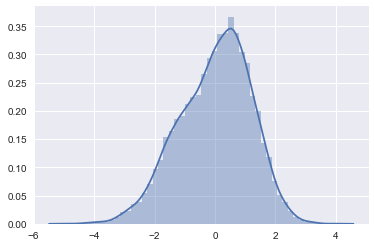

In [432]:
sns.distplot(res.resid)

In [436]:
sns.residplot(y = 'LOG_RIDERS',x = ['EDD_EMP_LOG','FREQ_S_LOG','EOL_SOL','HOUSING_09_DEN_LOG','SHR_INCOME_100P_LOG','PARK_HOURLY_AVG_ON_LOG','PARKING_RATE_OFF_RESIDENTIAL_LOG','ONTIME5','VC','AVG_TT_TO_WORK_MINUTES','AVG_BART'],data = data)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [438]:
# Run 142
# drop out travel time 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + VC \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:06:48   Log-Likelihood:                -22380.
No. Observations:               14020   AIC:                         4.478e+04
Df Residuals:                   14010   BIC:                         4.486e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [439]:
# Run 143
# drop out vc 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.326e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:07:18   Log-Likelihood:                -22601.
No. Observations:               14020   AIC:                         4.522e+04
Df Residuals:                   14011   BIC:                         4.529e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [440]:
# Run 144
# add in crowded 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + AVG_BART \
                       + CROWDED \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.201e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:07:42   Log-Likelihood:                -22560.
No. Observations:               14020   AIC:                         4.514e+04
Df Residuals:                   14010   BIC:                         4.522e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [441]:
for column in data.columns.sort_values():
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
BIKE_ALIGHTINGS
BIKE_ALIGHTINGS_LOG
BIKE_AVG
BIKE_AVG_LOG
BIKE_BOARDINGS
BIKE_BOARDINGS_LOG
BIKE_DOCKCOUNT
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EOL_SOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOUSING_09_DEN
HOUSING_09_DEN_LOG
HU_DEN_ACS
HU_DEN_ACS_LOG
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_RAC_DEN_LOG
LEISER_WAC_DEN
LEISER_WAC_DEN_LOG
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
MUNI_RAIL_ALIGHT

In [442]:
# Run 143
# stick with it

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5 \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.326e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:09:18   Log-Likelihood:                -22601.
No. Observations:               14020   AIC:                         4.522e+04
Df Residuals:                   14011   BIC:                         4.529e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [443]:
# Run 145
# start from 143, but test log of ontime perf. 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:10:01   Log-Likelihood:                -22592.
No. Observations:               14020   AIC:                         4.520e+04
Df Residuals:                   14011   BIC:                         4.527e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [445]:
# Run 146
# start from 145, but test log of BART ridership
# this is pretty good.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:12:12   Log-Likelihood:                -22594.
No. Observations:               14020   AIC:                         4.521e+04
Df Residuals:                   14011   BIC:                         4.527e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [447]:
# Run 147
# Test different specifications on frequency...
# not much different

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:13:31   Log-Likelihood:                -22986.
No. Observations:               14020   AIC:                         4.599e+04
Df Residuals:                   14011   BIC:                         4.606e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [450]:
# Run 148
# Test different specifications on frequency...
# substitute transbay for residential parking ratio--this makes sense because Housing units coeff increases
# this is our currentpreferred model. 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + TRANSBAY \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.577e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:16:48   Log-Likelihood:                -27246.
No. Observations:               16733   AIC:                         5.451e+04
Df Residuals:                   16724   BIC:                         5.458e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [451]:
# Run 149
# Test different specifications on frequency...
# try headway

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + HEADWAY_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + TRANSBAY \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.307e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:17:20   Log-Likelihood:                -28639.
No. Observations:               16733   AIC:                         5.730e+04
Df Residuals:                   16724   BIC:                         5.736e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [452]:
# Run 150
# Test different specifications on frequency...
# try headway W/O LOG

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + HEADWAY_S \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + TRANSBAY \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:18:02   Log-Likelihood:                -27778.
No. Observations:               16733   AIC:                         5.557e+04
Df Residuals:                   16724   BIC:                         5.564e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [453]:
# Run 146
# Repeat of our best model--run 146.  

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:29:42   Log-Likelihood:                -22594.
No. Observations:               14020   AIC:                         4.521e+04
Df Residuals:                   14011   BIC:                         4.527e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [454]:
# Run 151
# Start from 151 but add competing bus stops

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       + NUM_BUS_STOPS \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.197e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:30:52   Log-Likelihood:                -22582.
No. Observations:               14020   AIC:                         4.518e+04
Df Residuals:                   14010   BIC:                         4.526e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [461]:
# Run 152
# Start from 151 but add competing bus stops as log

data['NUM_BUS_STOPS_LOG'] = data['NUM_BUS_STOPS'].apply(lambda x : np.log(x+1))

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       + NUM_BUS_STOPS_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\numpy\linalg\linalg.py:1546: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


LinAlgError: SVD did not converge

In [462]:
data

,MONTH,DOW,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_ON,CALTRAIN_OFF,MUNI_RAIL_BOARDINGS,MUNI_RAIL_ALIGHTINGS,BIKE_ALIGHTINGS,BIKE_DOCKCOUNT,BIKE_BOARDINGS,NUM_BUS_STOPS,EDD_EMP,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_RAIL_AVG,BIKE_AVG,PARK_12_HR_OFF_PUB_LOG,BIKE_BOARDINGS_LOG,BIKE_ALIGHTINGS_LOG,BIKE_AVG_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,CAPACITY_LOG,CROWDED_LOG,CROWDHOURS_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FARE_LOG,FREQ_S_LOG,FULLFARE_REV_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,MUNI_RAIL_ALIGHTINGS_LOG,MUNI_RAIL_AVG_LOG,MUNI_RAIL_BOARDINGS_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_LOG,ON_LOG,ONTIME5_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,PASSDELAY_ARR_LOG,PASSDELAY_DEP_LOG,PASSHOURS_LOG,PASSMILES_LOG,POP_DEN_ACS_LOG,RDBRDNGS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_LOG,RUNSPEED_S_LOG,RUNTIME_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_LOG,TOTSPEED_S_LOG,TOTTIME_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,VC_LOG,WAITHOURS_LOG,EOL_SOL
0,2009-10-01,1,SFMTA,016AX,0,3,22,18.0,13,2,0.0,13.0,3612,NORIEGA A EXP,3,48TH AVENUE,10.666667,2.0,CYRIL MAGNIN ST & MARKET ST,5TH ST NORTH&MARKET ST NW,0,1,1.0,-3.875743,-0.070542,0.0,49.476280,0.00,0.000000,0.00,49.476280,0.000,0.000,0.00,0.00,0.00,0.00,0.737434,258.292460,0.240741,0.240741,258.292460,0.000000,20.102898,23.016448,516.584921,287.502463,91.157255,0.0,21.049339,0.000000,0.000000,189.00,0.000294,0.000000,0.000000,6317.0,4775.0,0.164817,0.835183,1.584002,129.001163,81.440025,97.511565,4772.0,4673.0,0.0,0.0,4136.0,2496.0,6848.0,19.0,6826.0,9.0,7134.0,5.625000,350.0,0.0,39.308818,199.634504,232.201161,4068.828658,717.267880,32.287304,963.525560,144.291088,1437.649130,0.912738,0.650953,0.003761,0.278084,0.067202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.313950,1468.019464,29.4,0.320246,0,129.266601,4.869583,4722.5,0.0,3316.0,6837.0,NaN,8.828641,8.831858,8.830251,NaN,NaN,NaN,NaN,8.460305,0.949339,3.414443,8.449771,8.470730,0.000000,0.000000,0.000000,5.247024,0.000000,0.000000,NaN,NaN,3.921504,0.0,8.872768,3.696570,5.301485,5.451901,8.311356,1.098612,1.890850,6.249174,2.456736,4.412071,5.860786,6.576843,4.590174,3.505176,6.871636,7.822845,8.106816,8.327726,2.302585,0.607144,0.215709,5.557957,0.552409,4.978739,7.271460,0.277818,4.523496,5.664704,3.049410,0.000000,4.867543,0.0,2.851513,7.292350,0.000000,0.000000,0.000000,0.000000,0.648536,0.501353,0.003754,0.245362,0.065040,0.000000,0.000000,

In [465]:
for col in data.columns.sort_values(): 
    print (col)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
BIKE_ALIGHTINGS
BIKE_ALIGHTINGS_LOG
BIKE_AVG
BIKE_AVG_LOG
BIKE_BOARDINGS
BIKE_BOARDINGS_LOG
BIKE_DOCKCOUNT
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EOL_SOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOUSING_09_DEN
HOUSING_09_DEN_LOG
HU_DEN_ACS
HU_DEN_ACS_LOG
IMP_TRIP_STOPS
LEISER_RAC_DEN
LEISER_RAC_DEN_LOG
LEISER_WAC_DEN
LEISER_WAC_DEN_LOG
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MONTH
MUNI_RAIL_ALIGHT

In [466]:
# Run 152
# Start from 151 but add distance to nearest bus stop


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + SERVMILES_S \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:36:07   Log-Likelihood:                -22684.
No. Observations:               14238   AIC:                         4.539e+04
Df Residuals:                   14229   BIC:                         4.545e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

In [467]:
# Run 153
# Start from 151 but add distance to nearest bus stop


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + SERVMILES_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


PatsyError: Error evaluating factor: NameError: name 'SERVMILES_S_LOG' is not defined
    LOG_RIDERS                        ~ EDD_EMP_LOG                        + SERVMILES_S_LOG                        + EOL_SOL                        + HOUSING_09_DEN_LOG                        + SHR_INCOME_100P_LOG                        + PARK_HOURLY_AVG_ON_LOG                        + PARKING_RATE_OFF_RESIDENTIAL_LOG                        + ONTIME5_LOG                        + AVG_BART_LOG                        -1
                                                                             ^^^^^^^^^^^^^^^

In [469]:
# Run 152
# Start from 151 but add distance to nearest bus stop

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:37:38   Log-Likelihood:                -20570.
No. Observations:               14020   AIC:                         4.116e+04
Df Residuals:                   14010   BIC:                         4.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [470]:
# Run 152
# Start from 151 but add distance to nearest bus stop


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + PARKING_RATE_OFF_RESIDENTIAL_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.645e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        16:39:58   Log-Likelihood:                -20559.
No. Observations:               14020   AIC:                         4.114e+04
Df Residuals:                   14010   BIC:                         4.121e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
EDD_EMP_

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [492]:
# Run 152
# Start from 151 but add distance to nearest bus stop


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + TRANSBAY \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.860e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:44:13   Log-Likelihood:                -25195.
No. Observations:               16733   AIC:                         5.041e+04
Df Residuals:                   16723   BIC:                         5.049e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [493]:
# Run 152
# Start from 151 but add distance to nearest bus stop
# -- This is a good variable to include and increases r^2, but reliability is slightly insignificant


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.067e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:44:17   Log-Likelihood:                -25195.
No. Observations:               16733   AIC:                         5.041e+04
Df Residuals:                   16724   BIC:                         5.048e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [494]:
# Run 153
# try without the log transform of reliability


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + ONTIME5 \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.067e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:44:20   Log-Likelihood:                -25195.
No. Observations:               16733   AIC:                         5.041e+04
Df Residuals:                   16724   BIC:                         5.048e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [498]:
data['DIST_FROM_LAST_STOP_LOG'] = data['DIST_FROM_LAST_STOP'].apply(lambda value: np.log(value + 1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [500]:
# Run 154
# try with the log transform of dist from stop and reliability to keep everything log-log


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + ONTIME5_LOG \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.292e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:47:55   Log-Likelihood:                -24399.
No. Observations:               16733   AIC:                         4.882e+04
Df Residuals:                   16724   BIC:                         4.888e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EDD_EMP_LOG               

In [503]:
# Rerun 153
# keep this


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + ONTIME5 \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.067e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:48:58   Log-Likelihood:                -25195.
No. Observations:               16733   AIC:                         5.041e+04
Df Residuals:                   16724   BIC:                         5.048e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [505]:
# Rerun 153
# try service miles instead of frequency because freq coeff is large

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + SERVMILES_S \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + ONTIME5 \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.748e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:50:20   Log-Likelihood:                -26472.
No. Observations:               16733   AIC:                         5.296e+04
Df Residuals:                   16724   BIC:                         5.303e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [507]:
data['SERVMILES_S_LOG'] = data['SERVMILES_S'].apply(lambda x : np.log(x + 1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [515]:
# Rerun 153
# try log of service miles instead of frequency because freq coeff is large
# -- this looks good, use it as the final model

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + SERVMILES_S_LOG \
                       + EOL_SOL \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + ONTIME5 \
                       + AVG_BART_LOG \
                       + DIST_FROM_LAST_STOP \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.560e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:56:07   Log-Likelihood:                -23538.
No. Observations:               16733   AIC:                         4.709e+04
Df Residuals:                   16724   BIC:                         4.716e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

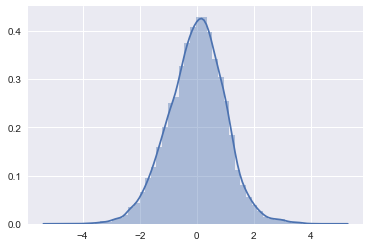

In [516]:
sns.distplot(res.resid)

TypeError: 'Series' object is not callable

In [524]:
data['EDD_EMP_LOG'].head(20)

0     8.872768
1     8.968651
2     6.967909
3     6.732211
4     7.082549
5     7.293698
6     8.504311
7     8.514389
8     6.933423
9     7.094235
10    2.944439
11    2.564949
12    1.791759
13    1.098612
14    1.791759
15    2.197225
16    2.397895
17    4.094345
18    2.890372
19    1.609438
Name: EDD_EMP_LOG, dtype: float64

In [525]:
res.resid.head(20)

0     0.126409
2    -1.656059
3    -2.206822
4    -1.717872
5    -0.947107
6    -0.586630
7    -0.973313
8     0.267114
9    -1.031069
10   -0.929356
11    0.653185
12    1.044417
13    1.022401
14    0.202599
15    0.024267
16   -0.068013
17    0.261760
18    0.190236
19    0.388607
20    0.066431
dtype: float64

In [526]:
residual = pd.DataFrame()

In [527]:
residual['RES'] = res.resid

In [529]:
residual['JOIN'] = residual.index

In [530]:
residual.head()

,RES,JOIN
0,0.126409,0
2,-1.656059,2
3,-2.206822,3
4,-1.717872,4
5,-0.947107,5


In [531]:
data['JOIN'] = data.index

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [532]:
res_plot_data = pd.merge(residual,data,how = 'left', on = 'JOIN') 

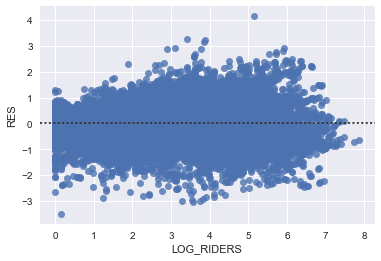

In [535]:
# a big of funneling (football shape), but not enough to void the assumption of homoscedacity 
sns.residplot(y = 'RES', x = 'LOG_RIDERS', dropna = True,data = res_plot_data)

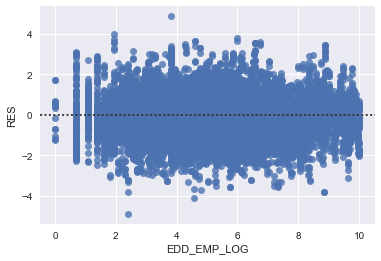

In [533]:
#the next few cells check each explanatory varaible to make sure that the transformations are correct
sns.residplot(y = 'RES', x = 'EDD_EMP_LOG', dropna = True,data = res_plot_data)

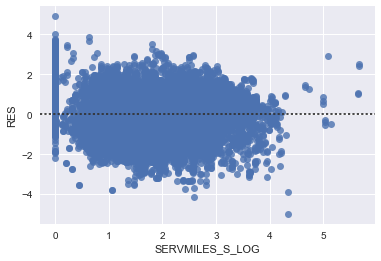

In [534]:
sns.residplot(y = 'RES', x = 'SERVMILES_S_LOG', dropna = True,data = res_plot_data)

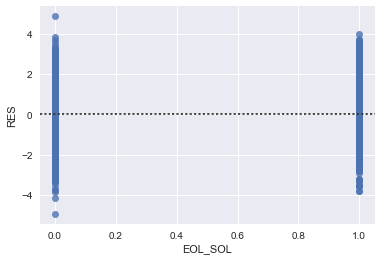

In [536]:
sns.residplot(y = 'RES', x = 'EOL_SOL', dropna = True,data = res_plot_data)

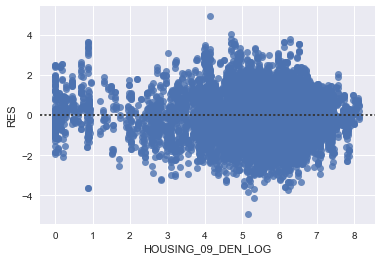

In [537]:
sns.residplot(y = 'RES', x = 'HOUSING_09_DEN_LOG', dropna = True,data = res_plot_data)

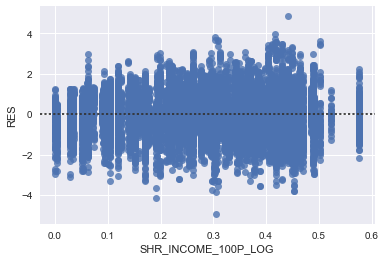

In [538]:
sns.residplot(y = 'RES', x = 'SHR_INCOME_100P_LOG', dropna = True,data = res_plot_data)

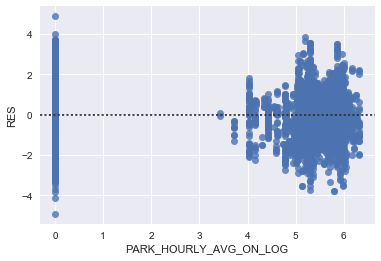

In [539]:
sns.residplot(y = 'RES', x = 'PARK_HOURLY_AVG_ON_LOG', dropna = True,data = res_plot_data)

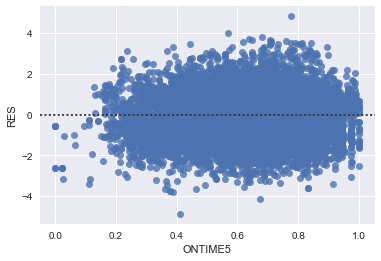

In [540]:
sns.residplot(y = 'RES', x = 'ONTIME5', dropna = True,data = res_plot_data)

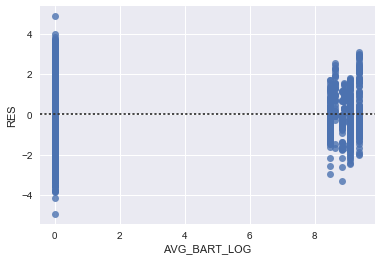

In [541]:
sns.residplot(y = 'RES', x = 'AVG_BART_LOG', dropna = True,data = res_plot_data)

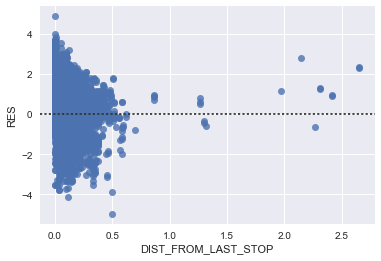

In [542]:
sns.residplot(y = 'RES', x = 'DIST_FROM_LAST_STOP', dropna = True,data = res_plot_data)

In [546]:
#drop out the rows with missing data in one of the variable columns used in the final model 
dropped = data[['LOG_RIDERS','EDD_EMP_LOG','STOP_ID','AVG_RIDE','SERVMILES_S_LOG','EOL_SOL','HOUSING_09_DEN_LOG','SHR_INCOME_100P_LOG','PARK_HOURLY_AVG_ON_LOG','ONTIME5','AVG_BART_LOG','DIST_FROM_LAST_STOP']].dropna()

In [547]:
dropped.to_csv('Final_Model_Data_Post_Drop.csv')

In [551]:
data[data['AVG_RIDE'] == 0]

,MONTH,DOW,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_ON,CALTRAIN_OFF,MUNI_RAIL_BOARDINGS,MUNI_RAIL_ALIGHTINGS,BIKE_ALIGHTINGS,BIKE_DOCKCOUNT,BIKE_BOARDINGS,NUM_BUS_STOPS,EDD_EMP,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_RAIL_AVG,BIKE_AVG,PARK_12_HR_OFF_PUB_LOG,BIKE_BOARDINGS_LOG,BIKE_ALIGHTINGS_LOG,BIKE_AVG_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,CAPACITY_LOG,CROWDED_LOG,CROWDHOURS_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FARE_LOG,FREQ_S_LOG,FULLFARE_REV_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,MUNI_RAIL_ALIGHTINGS_LOG,MUNI_RAIL_AVG_LOG,MUNI_RAIL_BOARDINGS_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_LOG,ON_LOG,ONTIME5_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,PASSDELAY_ARR_LOG,PASSDELAY_DEP_LOG,PASSHOURS_LOG,PASSMILES_LOG,POP_DEN_ACS_LOG,RDBRDNGS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_LOG,RUNSPEED_S_LOG,RUNTIME_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_LOG,TOTSPEED_S_LOG,TOTTIME_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,VC_LOG,WAITHOURS_LOG,EOL_SOL,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,JOIN
307,2009-10-01,1,SFMTA,108,0,3,22,0.0,76,0,0.0,75.833469,5413,TREASURE ISLAND,3,TREASURE ISLAND,18.947368,2.0,62 MACALLA ST,NaN,0,0,0.0,0.136842,0.136842,0.0,0.000000,420.28,11.585455,420.28,11.585455,176.396,175.582293,25.18,40.00,25.18,909.32,0.035088,0.0,0.0,53.636364,53.636364,124.490000,3.861818,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,63.000000,0.011139,0.000000,0.000000,2530.0,909.0,0.292629,0.707371,3.934681,3.762918,0.956346,1.351973,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,3.166667,0.0,0.0,2.819224,0.000000,12.565631,9.353725,26.679466,1.646899,0.024239,7.107062,9.329486,0.199067,0.105754,0.220840,0.329705,0.343701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992445,0.000000,29.7,NaN,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.596288,3.424263,0.0,0.0,0.0,0.0,0.0,4.158883,0.000000,0.000000,NaN,NaN,0.000000,0.0,NaN,1.340047,0.000000,2.607539,2.337346,1.098612,1.427116,0.0,2.993097,0.671079,0.000000,3.320691,0.855255,0.973389,0.023950,0.000000,0.000000,0.000000,0.693147,0.534955,0.0,0.0,0.034486,2.092736,2.335003,NaN,0.0,0.0,1.581412,4.832226,1.560861,0.0,0.689363,0.000000,3.713572,3.264996,2.532542,6.043298,0.181544,0.100528,0.199539,0.284957,0.295428,6.813796,3.264996,2.532542,6.043298,6.813445,7.836370,0.256678,0.011077,0.0,0,2.321000,1.200266,5.178385,307
330,2009-10-01,1,SFMTA,108,1,11,22,1.0,76,1,6.

In [553]:
len(data[data['ROUTE_SHORT_NAME'] == 'N-OWL'])

335

In [557]:
len(data[(data['ROUTE_SHORT_NAME'] == 'N-OWL')& (data['AVG_RIDE'] == 0)])

12

In [558]:
len(data[data['ROUTE_SHORT_NAME'] == 'M-OWL'])

143

In [559]:
len(data[(data['ROUTE_SHORT_NAME'] == 'M-OWL')& (data['AVG_RIDE'] == 0)])

66

In [560]:
len(data[data['ROUTE_SHORT_NAME'] == 'L-OWL'])

301

In [561]:
len(data[(data['ROUTE_SHORT_NAME'] == 'L-OWL')& (data['AVG_RIDE'] == 0)])

32